# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [1]:
#!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

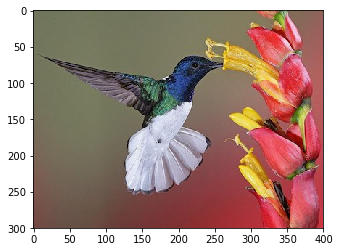

In [2]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("data/bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [3]:
from skimage import img_as_float
img_01=img_as_float(img)

In [4]:
img_01

array([[[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43529412,  0.45882353,  0.35686275],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118],
        [ 0.56862745,  0.38431373,  0.35294118]],

       [[ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        [ 0.43921569,  0.4627451 ,  0.36078431],
        ..., 
        [ 0.56078431,  0.38823529,  0.35294118],
        [ 0.56470588,  0.38039216,  0.34901961],
        [ 0.56470588,  0.38039216,  0.34901961]],

       ..., 
       [[ 0.45098039,  0.2745098 ,  0.25490196],
        

In [5]:
img_01.shape

(300, 400, 3)

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [6]:
X=np.vstack((np.ravel(img_01[:,:,0]), np.ravel(img_01[:,:,1]), np.ravel(img_01[:,:,2]))).T

In [7]:
X

array([[ 0.43529412,  0.45882353,  0.35686275],
       [ 0.43529412,  0.45882353,  0.35686275],
       [ 0.43529412,  0.45882353,  0.35686275],
       ..., 
       [ 0.81176471,  0.2       ,  0.25490196],
       [ 0.80392157,  0.19607843,  0.25882353],
       [ 0.79607843,  0.19607843,  0.26666667]])

In [8]:
X.shape

(120000, 3)

### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [9]:
from sklearn.cluster import KMeans

In [10]:
%%time
clf = KMeans(n_clusters=8,random_state=42)
clf.fit(X)

CPU times: user 9.46 s, sys: 128 ms, total: 9.58 s
Wall time: 3.6 s


In [11]:
clf.cluster_centers_

array([[ 0.87426584,  0.41141005,  0.45389307],
       [ 0.40251815,  0.33348319,  0.30486771],
       [ 0.77848416,  0.76429134,  0.83491962],
       [ 0.86415086,  0.72932819,  0.31493268],
       [ 0.15515594,  0.14468971,  0.16788021],
       [ 0.54608214,  0.21978915,  0.22313966],
       [ 0.48604564,  0.45903667,  0.37709317],
       [ 0.75861981,  0.28594402,  0.29189326]])

In [12]:
clf.cluster_centers_.shape

(8, 3)

### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

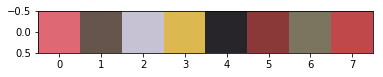

In [13]:
plt.imshow(clf.cluster_centers_.reshape((1,8,3)))

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответствующие им центры кластеров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

In [14]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

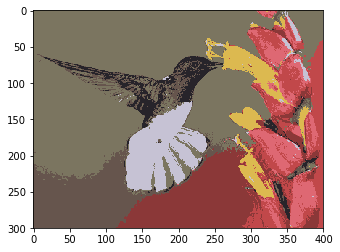

In [15]:
plt.imshow(recreate_image(clf.cluster_centers_, clf.labels_, img_01.shape[0], img_01.shape[1]))

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался полдня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('data/checkins.csv.gz', compression='gzip')
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [18]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


In [19]:
df.shape

(100000, 2)

###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [20]:
from sklearn.cluster import MeanShift
bandwidth = 0.1

In [21]:
%%time
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

CPU times: user 3.47 s, sys: 8 ms, total: 3.48 s
Wall time: 3.48 s


In [22]:
labels

array([ 5,  7, 28, ..., 23, 19,  4])

In [23]:
cluster_centers.shape

(3092, 2)

In [24]:
np.unique(labels)

array([   0,    1,    2, ..., 3089, 3090, 3091])

In [25]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3092


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответствии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

In [26]:
df['label']=labels

In [27]:
df_office = pd.DataFrame([[33.751277, -118.188740], 
[25.867736, -80.324116],
[51.503016, -0.075479],
[52.378894, 4.885084], 
[39.366487, 117.036146],
[-33.868457, 151.205134]], columns=['latitude', 'longitude'])

In [28]:
df_office

,latitude,longitude
0,33.751277,-118.188740
1,25.867736,-80.324116
2,51.503016,-0.075479
3,52.378894,4.885084
4,39.366487,117.036146
5,-33.868457,151.205134


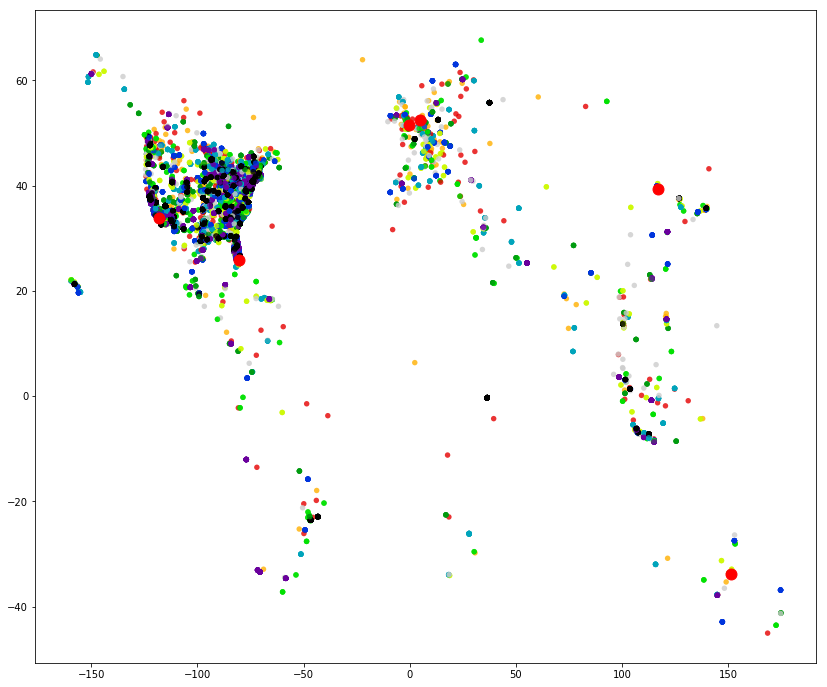

In [29]:
plt.figure(figsize=(14,12))
plt.scatter(df['longitude'],df['latitude'], c=df['label'],cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.scatter(df_office['longitude'],df_office['latitude'] , c='red', s=120)

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [30]:
df.head()

,latitude,longitude,label
0,38.895112,-77.036366,5
1,33.800745,-84.410520,7
2,45.523452,-122.676207,28
3,40.764462,-111.904565,63
4,33.448377,-112.074037,2


In [31]:
df[df['label'] == 7].shape

(1601, 3)

In [32]:
df['count_points']=  df.groupby('label')['label'].transform('count')
keep_label = df[df['count_points'] > 15 ]['label'].unique()
len(keep_label)

589

** Ответ:**  количество кластеров удовлетворяющее условию ** 589 ** 

In [33]:
df.head()

,latitude,longitude,label,count_points
0,38.895112,-77.036366,5,2445
1,33.800745,-84.410520,7,1601
2,45.523452,-122.676207,28,622
3,40.764462,-111.904565,63,186
4,33.448377,-112.074037,2,4677


###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [34]:
df_cluster_centers = pd.DataFrame(cluster_centers, columns=['latitude', 'longitude'])
df_cluster_centers.head()

,latitude,longitude
0,40.717716,-73.991835
1,33.446380,-111.901888
2,33.448410,-112.074004
3,41.878244,-87.629843
4,37.688682,-122.409330


In [35]:
df_cluster_centers['keep_label'] = [ elem in keep_label for elem in df_cluster_centers.index]

In [36]:
list_keep_clusters_index = keep_label
list_offices = list(df_office.index)
df_dist= pd.DataFrame(index = range(len(list_keep_clusters_index)* len(list_offices)), columns=['n_cluster', 'n_office', 'dist'])
df_dist.shape

(3534, 3)

In [37]:
idx=0
for cluster in list_keep_clusters_index:
    for office in list_offices:
        diff_longitude = df_cluster_centers.iloc[cluster]['longitude'] - df_office.iloc[office]['longitude']
        diff_latitude = df_cluster_centers.iloc[cluster]['latitude'] - df_office.iloc[office]['latitude']
        dist= np.sqrt(diff_longitude**2 + diff_latitude**2)
        df_dist.iloc[idx]=[cluster,office,dist]   
        idx=idx+1

In [38]:
df_dist_sort = df_dist.sort_values('dist', ascending=True)

In [39]:
df_dist_sort.head(20)

,n_cluster,n_office,dist
863,403,5,0.00783476
1635,371,3,0.00935332
2119,301,1,0.0223584
728,58,2,0.0500583
108,51,0,0.0708477
1021,25,1,0.134109
865,167,1,0.167406
768,192,0,0.186536
685,91,1,0.188876
1140,85,0,0.195779


In [40]:
df_cluster_centers.iloc[df_dist_sort.head(20)['n_cluster']]

,latitude,longitude,keep_label
403,-33.860630,151.204776,True
371,52.372964,4.892317,True
301,25.883050,-80.307826,True
58,51.502991,-0.125537,True
51,33.809878,-118.148924,True
25,25.785812,-80.217938,True
167,25.705350,-80.283429,True
192,33.931836,-118.141898,True
91,26.010098,-80.199991,True
85,33.888325,-118.048928,True


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 